In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from lazypredict.Supervised import LazyRegressor
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge, HuberRegressor, LogisticRegression, BayesianRidge
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

C:\Users\haris\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df_train = pd.read_csv("TRAIN.csv")

In [3]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
df_test = pd.read_csv("TEST.csv")

In [5]:
df_test.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,767,1,2013-04-01,0,0,b,1
1,1111,6,2013-03-16,1,0,0,0
2,45,4,2013-08-01,1,1,0,1
3,500,4,2013-05-23,1,0,0,1
4,82,2,2013-08-06,1,0,0,1


In [6]:
df_store = pd.read_csv("store.csv")

In [7]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.00,9.00,2008.00,0,nan,nan,NaN
1,2,a,a,570.00,11.00,2007.00,1,13.00,2010.00,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.00,12.00,2006.00,1,14.00,2011.00,"Jan,Apr,Jul,Oct"
3,4,c,c,620.00,9.00,2009.00,0,nan,nan,NaN
4,5,a,a,29910.00,4.00,2015.00,0,nan,nan,NaN


In [8]:
df_train.shape

(712046, 9)

In [9]:
df_test.shape

(305163, 7)

In [10]:
df_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,712046.00,712046.00,712046.00,712046.00,712046.00,712046.00,712046.00
mean,558.43,4.00,5872.08,637.98,0.83,0.38,0.17
std,321.97,2.00,3918.57,468.45,0.38,0.49,0.38
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,3795.00,410.00,1.00,0.00,0.00
50%,558.00,4.00,5848.00,614.00,1.00,0.00,0.00
75%,838.00,6.00,7991.00,843.00,1.00,1.00,0.00
max,1115.00,7.00,41551.00,5494.00,1.00,1.00,1.00


In [11]:
df_train['Store'].value_counts()

233     669
168     669
330     669
167     669
331     669
       ... 
571     484
1080    484
952     484
684     484
512     484
Name: Store, Length: 1115, dtype: int64

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712046 entries, 0 to 712045
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Store          712046 non-null  int64 
 1   DayOfWeek      712046 non-null  int64 
 2   Date           712046 non-null  object
 3   Sales          712046 non-null  int64 
 4   Customers      712046 non-null  int64 
 5   Open           712046 non-null  int64 
 6   Promo          712046 non-null  int64 
 7   StateHoliday   712046 non-null  object
 8   SchoolHoliday  712046 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 48.9+ MB


In [13]:
df_train.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [14]:
df_test.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [15]:
df_train['StateHoliday'].value_counts()

0    557868
0    131072
a     14546
b      4460
c      4100
Name: StateHoliday, dtype: int64

In [16]:
df3 = pd.merge(df_train, df_store, on = "Store" )

In [17]:
df3.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.00,9.00,2008.00,0,nan,nan,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.00,9.00,2008.00,0,nan,nan,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.00,9.00,2008.00,0,nan,nan,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.00,9.00,2008.00,0,nan,nan,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.00,9.00,2008.00,0,nan,nan,NaN


In [18]:
df3.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            1821
CompetitionOpenSinceMonth    226460
CompetitionOpenSinceYear     226460
Promo2                            0
Promo2SinceWeek              359143
Promo2SinceYear              359143
PromoInterval                359143
dtype: int64

In [19]:
df3.shape

(712046, 18)

In [20]:
df3.drop(['PromoInterval','Promo2SinceYear','Promo2SinceWeek','CompetitionOpenSinceYear','CompetitionOpenSinceMonth'], axis = 1, inplace = True)

In [21]:
df3.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.00,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.00,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.00,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.00,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.00,0


In [22]:
### store column can be dropped as it contains similar info to store type

df3.drop(["Store"], axis = 1, inplace = True)

In [23]:
df3.head()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.00,0
1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.00,0
2,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.00,0
3,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.00,0
4,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.00,0


In [24]:
df3['Open'].value_counts()

1    589983
0    122063
Name: Open, dtype: int64

In [25]:
df3['Promo'].value_counts()

0    441041
1    271005
Name: Promo, dtype: int64

In [26]:
df3['StoreType'].value_counts()

a    386873
d    217674
c     96322
b     11177
Name: StoreType, dtype: int64

In [27]:
df3['Assortment'].value_counts()

a    375158
c    331058
b      5830
Name: Assortment, dtype: int64

In [28]:
df3.describe()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2
count,712046.00,712046.00,712046.00,712046.00,712046.00,712046.00,710225.00,712046.00
mean,4.00,5872.08,637.98,0.83,0.38,0.17,5440.97,0.50
std,2.00,3918.57,468.45,0.38,0.49,0.38,7739.05,0.50
min,1.00,0.00,0.00,0.00,0.00,0.00,20.00,0.00
25%,2.00,3795.00,410.00,1.00,0.00,0.00,710.00,0.00
50%,4.00,5848.00,614.00,1.00,0.00,0.00,2330.00,0.00
75%,6.00,7991.00,843.00,1.00,1.00,0.00,6890.00,1.00
max,7.00,41551.00,5494.00,1.00,1.00,1.00,75860.00,1.00


In [29]:
df3['CompetitionDistance'].mean()

5440.974437678201

In [30]:
df3['CompetitionDistance'].fillna(df3['CompetitionDistance'].mean(), inplace=True)


In [31]:
df3.isnull().sum()

DayOfWeek              0
Date                   0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

In [32]:
df3.dtypes

DayOfWeek                int64
Date                    object
Sales                    int64
Customers                int64
Open                     int64
Promo                    int64
StateHoliday            object
SchoolHoliday            int64
StoreType               object
Assortment              object
CompetitionDistance    float64
Promo2                   int64
dtype: object

In [33]:
df3.head(2)

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
0,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.00,0
1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.00,0


In [34]:
df3["Day"] = pd.to_datetime(df3.Date, format="%Y-%m-%d").dt.day
df3.head()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Day
0,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.00,0,31
1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.00,0,30
2,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.00,0,29
3,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.00,0,28
4,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.00,0,27


In [35]:
df3["Month"] = pd.to_datetime(df3.Date, format="%Y-%m-%d").dt.month
df3.head()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Day,Month
0,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.00,0,31,7
1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.00,0,30,7
2,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.00,0,29,7
3,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.00,0,28,7
4,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.00,0,27,7


In [36]:
df3["Year"] = pd.to_datetime(df3.Date, format="%Y-%m-%d").dt.year
df3.head()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Day,Month,Year
0,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.00,0,31,7,2015
1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.00,0,30,7,2015
2,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.00,0,29,7,2015
3,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.00,0,28,7,2015
4,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.00,0,27,7,2015


In [37]:
df3.drop(["Date"], axis = 1, inplace = True)

In [38]:
df3.head()

,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Day,Month,Year
0,5,5263,555,1,1,0,1,c,a,1270.00,0,31,7,2015
1,4,5020,546,1,1,0,1,c,a,1270.00,0,30,7,2015
2,3,4782,523,1,1,0,1,c,a,1270.00,0,29,7,2015
3,2,5011,560,1,1,0,1,c,a,1270.00,0,28,7,2015
4,1,6102,612,1,1,0,1,c,a,1270.00,0,27,7,2015


In [39]:
df3.Year.value_counts()

2014    373855
2015    236380
2013    101811
Name: Year, dtype: int64

In [40]:
df3.Month.value_counts()

5     69130
3     69130
1     69130
6     66900
4     66900
12    63550
7     63550
10    62781
2     62440
11    61500
8     28985
9     28050
Name: Month, dtype: int64

In [41]:
df3.columns

Index(['DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'Promo2', 'Day', 'Month', 'Year'],
      dtype='object')

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

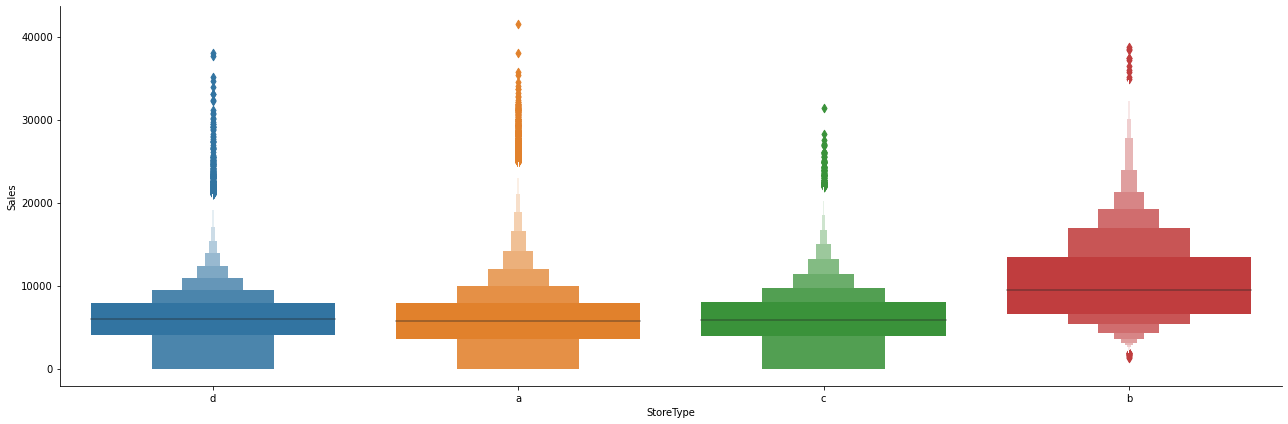

In [43]:
# store vs sales
sns.catplot(y = "Sales", x = "StoreType", data = df3.sort_values("Sales", ascending = True), kind="boxen", height = 6, aspect = 3)
plt.show()

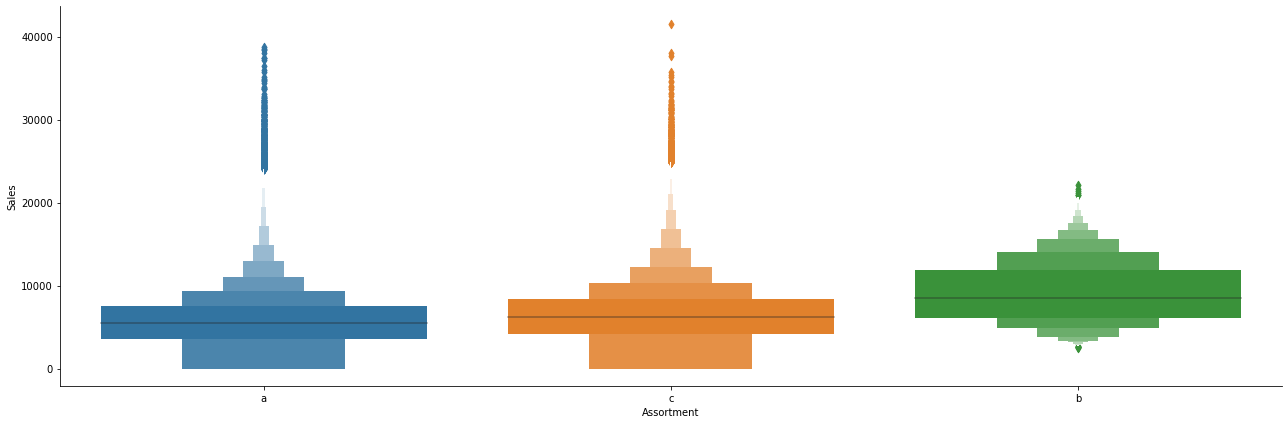

In [44]:
# Assortment vs sales
sns.catplot(y = "Sales", x = "Assortment", data = df3.sort_values("Sales", ascending = True), kind="boxen", height = 6, aspect = 3)
plt.show()

In [45]:
#since customers is not present in the test data hence removing it

df3.drop(['Customers'], axis = 1, inplace = True)

In [46]:
df3.head()

,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Day,Month,Year
0,5,5263,1,1,0,1,c,a,1270.00,0,31,7,2015
1,4,5020,1,1,0,1,c,a,1270.00,0,30,7,2015
2,3,4782,1,1,0,1,c,a,1270.00,0,29,7,2015
3,2,5011,1,1,0,1,c,a,1270.00,0,28,7,2015
4,1,6102,1,1,0,1,c,a,1270.00,0,27,7,2015


In [47]:
# As for Categorical data we will perform OneHotEncoding

StoreType = df3[["StoreType"]]

StoreType = pd.get_dummies(StoreType, drop_first= True)

StoreType.head()

,StoreType_b,StoreType_c,StoreType_d
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


In [48]:
# As for Categorical data we will perform OneHotEncoding

Assortment = df3[["Assortment"]]

Assortment = pd.get_dummies(Assortment, drop_first= True)



In [49]:
Assortment['Assortment_b'].value_counts()

0    706216
1      5830
Name: Assortment_b, dtype: int64

In [50]:
Assortment['Assortment_c'].value_counts()

0    380988
1    331058
Name: Assortment_c, dtype: int64

In [51]:
df3.drop(["StoreType", "Assortment"], axis = 1, inplace = True)

In [52]:
data_train = pd.concat([df3, Assortment, StoreType], axis = 1)


In [53]:
data_train.head()

,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Day,Month,Year,Assortment_b,Assortment_c,StoreType_b,StoreType_c,StoreType_d
0,5,5263,1,1,0,1,1270.00,0,31,7,2015,0,0,0,1,0
1,4,5020,1,1,0,1,1270.00,0,30,7,2015,0,0,0,1,0
2,3,4782,1,1,0,1,1270.00,0,29,7,2015,0,0,0,1,0
3,2,5011,1,1,0,1,1270.00,0,28,7,2015,0,0,0,1,0
4,1,6102,1,1,0,1,1270.00,0,27,7,2015,0,0,0,1,0


In [54]:
data_train.columns

Index(['DayOfWeek', 'Sales', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'CompetitionDistance', 'Promo2', 'Day', 'Month', 'Year', 'Assortment_b',
       'Assortment_c', 'StoreType_b', 'StoreType_c', 'StoreType_d'],
      dtype='object')

In [55]:
X = data_train.loc[:,['DayOfWeek','Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'CompetitionDistance', 'Promo2', 'Day', 'Month', 'Year', 'Assortment_b',
       'Assortment_c', 'StoreType_b', 'StoreType_c', 'StoreType_d']]


In [56]:
y = data_train['Sales']

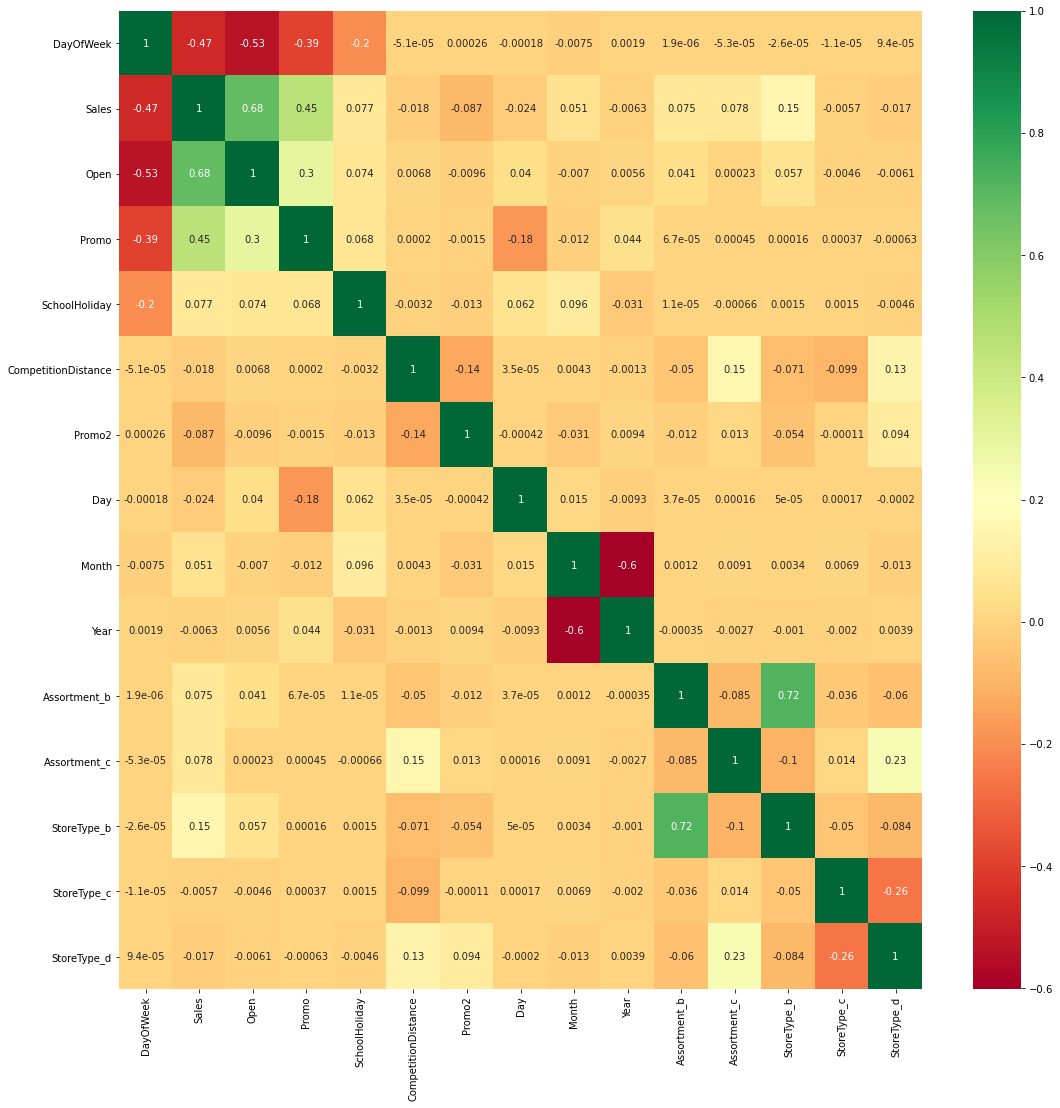

In [57]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(data_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [59]:
X.head()

,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Day,Month,Year,Assortment_b,Assortment_c,StoreType_b,StoreType_c,StoreType_d
0,5,1,1,0,1,1270.00,0,31,7,2015,0,0,0,1,0
1,4,1,1,0,1,1270.00,0,30,7,2015,0,0,0,1,0
2,3,1,1,0,1,1270.00,0,29,7,2015,0,0,0,1,0
3,2,1,1,0,1,1270.00,0,28,7,2015,0,0,0,1,0
4,1,1,1,0,1,1270.00,0,27,7,2015,0,0,0,1,0


In [60]:
X_train.head()

,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Day,Month,Year,Assortment_b,Assortment_c,StoreType_b,StoreType_c,StoreType_d
554951,7,0,0,0,0,780.00,0,1,6,2014,0,0,0,0,0
546903,1,1,0,0,0,3370.00,1,6,7,2015,0,0,0,0,0
141196,3,1,1,0,0,2920.00,1,18,12,2013,0,1,0,0,1
524695,4,1,1,0,0,16210.00,0,24,10,2013,0,1,0,0,0
262288,3,1,0,0,0,40.00,1,12,3,2014,0,0,0,1,0


In [61]:
X_train.dtypes

DayOfWeek                int64
Open                     int64
Promo                    int64
StateHoliday            object
SchoolHoliday            int64
CompetitionDistance    float64
Promo2                   int64
Day                      int64
Month                    int64
Year                     int64
Assortment_b             uint8
Assortment_c             uint8
StoreType_b              uint8
StoreType_c              uint8
StoreType_d              uint8
dtype: object

In [62]:
X.drop(['StateHoliday'], axis = 1, inplace = True)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [64]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [65]:
reg_rf.score(X_train, y_train)


0.961180044709056

In [66]:
y_pred = reg_rf.predict(X_test)


In [67]:
reg_rf.score(X_test, y_test)


0.8567518199659905

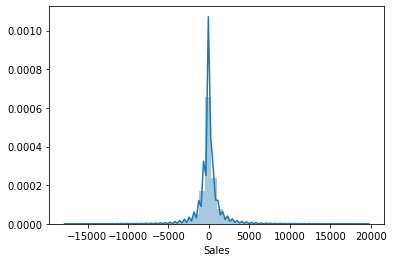

In [68]:
sns.distplot(y_test-y_pred)
plt.show()


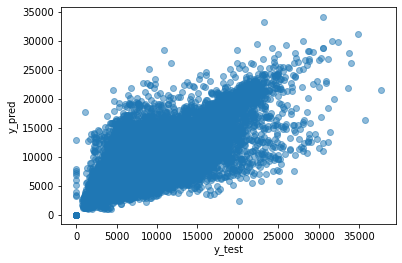

In [69]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [70]:
from sklearn import metrics


In [71]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 786.3404823392356
MSE: 2207088.741523677
RMSE: 1485.627389867216


In [72]:

metrics.r2_score(y_test, y_pred)


0.8567518199659905

In [73]:
df_test.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,767,1,2013-04-01,0,0,b,1
1,1111,6,2013-03-16,1,0,0,0
2,45,4,2013-08-01,1,1,0,1
3,500,4,2013-05-23,1,0,0,1
4,82,2,2013-08-06,1,0,0,1


In [74]:
df4 = pd.merge(df_test, df_store, on = "Store" )
df4.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,767,1,2013-04-01,0,0,b,1,a,c,13080.00,nan,nan,0,nan,nan,NaN
1,767,3,2013-08-07,1,0,0,0,a,c,13080.00,nan,nan,0,nan,nan,NaN
2,767,7,2013-04-07,0,0,0,0,a,c,13080.00,nan,nan,0,nan,nan,NaN
3,767,6,2013-07-13,1,0,0,0,a,c,13080.00,nan,nan,0,nan,nan,NaN
4,767,2,2013-01-01,0,0,a,1,a,c,13080.00,nan,nan,0,nan,nan,NaN


In [75]:
df4.drop(['PromoInterval','Promo2SinceYear','Promo2SinceWeek','CompetitionOpenSinceYear','CompetitionOpenSinceMonth'], axis = 1, inplace = True)

In [76]:
### store column can be dropped as it contains similar info to store type

df4.drop(["Store"], axis = 1, inplace = True)

In [77]:
df4.isnull().sum()

DayOfWeek                0
Date                     0
Open                     0
Promo                    0
StateHoliday             0
SchoolHoliday            0
StoreType                0
Assortment               0
CompetitionDistance    821
Promo2                   0
dtype: int64

In [78]:
df4['CompetitionDistance'].fillna(df4['CompetitionDistance'].mean(), inplace=True)


In [79]:
df4["Day"] = pd.to_datetime(df4.Date, format="%Y-%m-%d").dt.day
df4.head()

,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Day
0,1,2013-04-01,0,0,b,1,a,c,13080.00,0,1
1,3,2013-08-07,1,0,0,0,a,c,13080.00,0,7
2,7,2013-04-07,0,0,0,0,a,c,13080.00,0,7
3,6,2013-07-13,1,0,0,0,a,c,13080.00,0,13
4,2,2013-01-01,0,0,a,1,a,c,13080.00,0,1


In [80]:
df4["Month"] = pd.to_datetime(df4.Date, format="%Y-%m-%d").dt.month
df4.head()

,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Day,Month
0,1,2013-04-01,0,0,b,1,a,c,13080.00,0,1,4
1,3,2013-08-07,1,0,0,0,a,c,13080.00,0,7,8
2,7,2013-04-07,0,0,0,0,a,c,13080.00,0,7,4
3,6,2013-07-13,1,0,0,0,a,c,13080.00,0,13,7
4,2,2013-01-01,0,0,a,1,a,c,13080.00,0,1,1


In [81]:
df4["Year"] = pd.to_datetime(df4.Date, format="%Y-%m-%d").dt.year
df4.head()

,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Day,Month,Year
0,1,2013-04-01,0,0,b,1,a,c,13080.00,0,1,4,2013
1,3,2013-08-07,1,0,0,0,a,c,13080.00,0,7,8,2013
2,7,2013-04-07,0,0,0,0,a,c,13080.00,0,7,4,2013
3,6,2013-07-13,1,0,0,0,a,c,13080.00,0,13,7,2013
4,2,2013-01-01,0,0,a,1,a,c,13080.00,0,1,1,2013


In [82]:
df4.drop(["Date"], axis = 1, inplace = True)

In [83]:
# As for Categorical data we will perform OneHotEncoding

StoreType = df4[["StoreType"]]

StoreType = pd.get_dummies(StoreType, drop_first= True)

StoreType.head()

,StoreType_b,StoreType_c,StoreType_d
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [84]:
# As for Categorical data we will perform OneHotEncoding

Assortment = df4[["Assortment"]]

Assortment = pd.get_dummies(Assortment, drop_first= True)

In [85]:
df4.drop(["StoreType", "Assortment"], axis = 1, inplace = True)

In [86]:
data_test = pd.concat([df4, Assortment, StoreType], axis = 1)


In [87]:
data_test.drop(['StateHoliday'], axis = 1, inplace = True)

In [88]:
data_test.head()

,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Day,Month,Year,Assortment_b,Assortment_c,StoreType_b,StoreType_c,StoreType_d
0,1,0,0,1,13080.00,0,1,4,2013,0,1,0,0,0
1,3,1,0,0,13080.00,0,7,8,2013,0,1,0,0,0
2,7,0,0,0,13080.00,0,7,4,2013,0,1,0,0,0
3,6,1,0,0,13080.00,0,13,7,2013,0,1,0,0,0
4,2,0,0,1,13080.00,0,1,1,2013,0,1,0,0,0


In [89]:
X_test.head(2)

,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,Promo2,Day,Month,Year,Assortment_b,Assortment_c,StoreType_b,StoreType_c,StoreType_d
534087,7,0,0,0,6890.00,1,11,1,2015,0,1,0,0,1
376798,1,1,0,0,4520.00,1,7,4,2014,0,1,0,0,1


In [90]:
y_pred_pred = reg_rf.predict(data_test)

In [91]:
y_pred_pred

array([   0.  , 5366.6 ,    0.  , ..., 2445.39, 3140.36, 2745.65])

In [92]:
pred_test = pd.DataFrame(y_pred_pred, columns = ['Sales'])
pred_test.head()

,Sales
0,0.00
1,5366.60
2,0.00
3,3522.42
4,0.00


In [93]:
# saving the dataframe
pred_test.to_csv('submission.csv')

In [94]:
#splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((498432, 14), (213614, 14), (498432,), (213614,))

In [95]:
models = [['LinearRegression : ', LinearRegression()],
          ['Lasso : ', Lasso()],
          ['Ridge : ', Ridge()],
          ['KNeighborsRegressor : ', KNeighborsRegressor()],
          ['DecisionTreeRegressor : ', DecisionTreeRegressor()],
          ['RandomForestRegressor : ', RandomForestRegressor()],
          ['AdaBoostRegressor : ', AdaBoostRegressor()],
          ['GradientBoostingRegressor : ', GradientBoostingRegressor()],
          ['ExtraTreeRegressor : ', ExtraTreeRegressor()],
          ['HuberRegressor : ', HuberRegressor()],
          ['XGBRegressor : ', XGBRegressor()],
          ['BayesianRidge : ', BayesianRidge()]]

In [96]:
for name, model in models:
    model=model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

LinearRegression :  2568.1760179777516
Lasso :  2568.563992477949
Ridge :  2568.177707965953
KNeighborsRegressor :  2506.2304701528547
DecisionTreeRegressor :  1811.7591207224957
RandomForestRegressor :  1459.874229479047
AdaBoostRegressor :  2999.6740305765616
GradientBoostingRegressor :  2308.0797902347313
ExtraTreeRegressor :  2494.717196770309
HuberRegressor :  3446.505055088521
[23:12:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor :  2304.9747857059665
BayesianRidge :  2568.178232424112


In [97]:
algorithms = {
    'XGBRegressor' : {
        'model' : XGBRegressor(),
        'param' : {
            'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'gamma' : [0.1,0.2, 0.3, 0.4, 0.5],
            'min_child_weight' : [1, 3, 5, 7, 9],
            'colsample_bytree' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30]
        }
    },
    'RandomForestRegressor' : {
        'model' : RandomForestRegressor(),
        'param' : {
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }
    },
    'GradientBoostingRegressor' : {
        'model' : GradientBoostingRegressor(),
        'param' : {
            'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'criterion' : ['friedman_mse', 'mse']
        }
    }
}

In [ ]:
score = []

for name, mp in algorithms.items() :
    rs = RandomizedSearchCV(estimator = mp['model'], param_distributions = mp['param'], cv = 10, n_jobs=-1, verbose=3)
    rs.fit(X_train, y_train)
    score.append({
        'model': name,
        'score' : rs.best_score_,
        'params' : rs.best_params_
    })

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 31.1min finished
[23:46:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 31.1min finished


[23:46:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
